In [43]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans    #Importing the necessary required python libraries

In [44]:
df = pd.read_csv("StudentsPerformance (1).csv")   #Loading the student performance dataset onto a panda dataframe  
df.shape   #Calculating the dimensions of the df

(1000, 8)

In [45]:
df.isnull().sum()  #Checking for null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [46]:
df.isna().any().count()

8

In [47]:
df.isnull().any().count()

8

In [48]:
df.dtypes   #Checking the datatypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [49]:
df["test preparation course"].replace(['completed', 'none'], ['completed', None], inplace = True)   #Inserting Null values

In [50]:
df.isnull().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [51]:
import numpy as np

def introduce_nulls(column, num_nulls):
    indices = np.random.choice(column.index, num_nulls, replace=False)   #Generating a list of random indices
    column.loc[indices] = np.nan    #Replacing the value at those indices with null values
    return column

np.random.seed(42)  
for col in ['math score', 'reading score', 'writing score']:
    num_nulls = np.random.randint(50, 71)   #Generating a random number between 50 and 71
    df[col] = introduce_nulls(df[col], num_nulls)

df.isnull().sum()    #Checking if null values inserted successfully


/tmp/ipykernel_3576/2316235123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[indices] = np.nan    #Replacing the value at those indices with null values
/tmp/ipykernel_3576/2316235123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[indices] = np.nan    #Replacing the value at those indices with null values
/tmp/ipykernel_3576/2316235123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[indic

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                      56
reading score                   61
writing score                   60
dtype: int64

In [52]:
df[['math score', 'reading score', 'writing score']] = df[['math score', 'reading score', 'writing score']].apply(lambda col: col.fillna(col.median()))

In [53]:
df.isnull().sum()


gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [54]:
 df.describe()   

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.164000,69.165000,68.129000
std,14.497078,14.158964,14.656301
min,18.000000,17.000000,10.000000
25%,57.000000,60.000000,58.750000
50%,66.000000,70.000000,69.000000
75%,76.000000,78.000000,78.000000
max,100.000000,100.000000,100.000000


In [55]:
numeric_cols = ['math score','reading score','writing score']
medianFiller = lambda x: x.fillna(x.median())
df[numeric_cols] = df[numeric_cols].apply(medianFiller,axis=0)

df['math score'] = df['math score'].astype('float64')   #Converting into float64 dtype 

/tmp/ipykernel_3576/3690173178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["math score"]])   #Plotting a density curve to check for skewness


<Axes: ylabel='Density'>

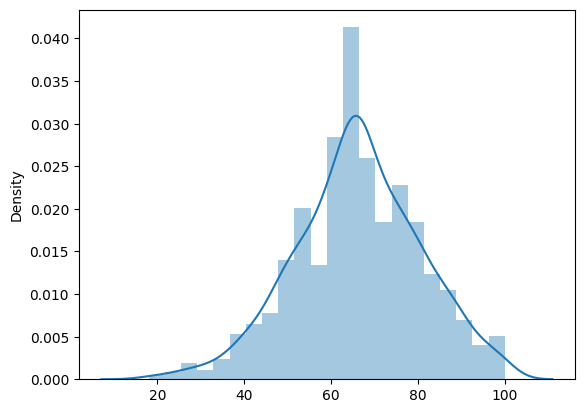

In [56]:
sns.distplot(df[["math score"]])   #Plotting a density curve to check for skewness

/tmp/ipykernel_3576/3346480777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["reading score"]])   #Plotting a density curve to check for skewness


<Axes: ylabel='Density'>

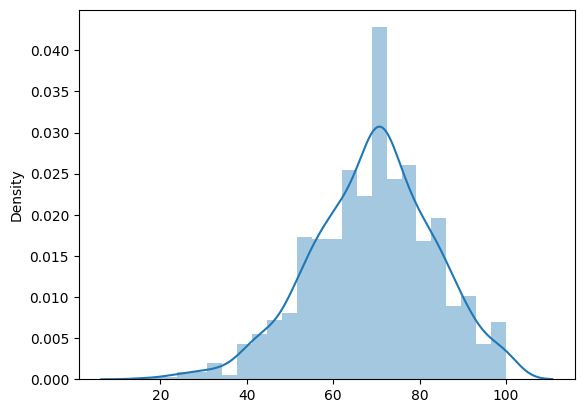

In [57]:
sns.distplot(df[["reading score"]])   #Plotting a density curve to check for skewness

/tmp/ipykernel_3576/1320157149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["writing score"]])   #Plotting a density curve to check for skewness


<Axes: ylabel='Density'>

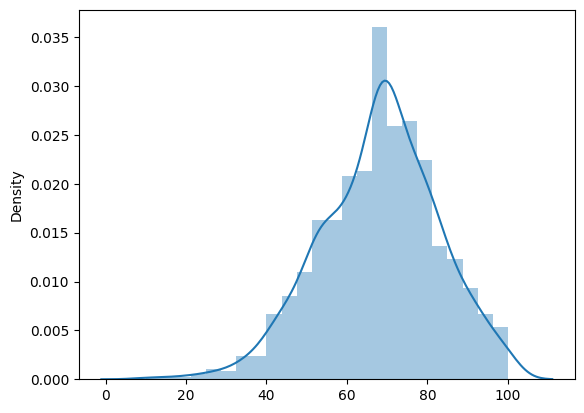

In [58]:
sns.distplot(df[["writing score"]])   #Plotting a density curve to check for skewness

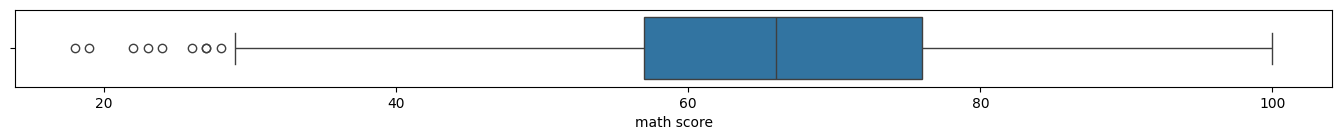

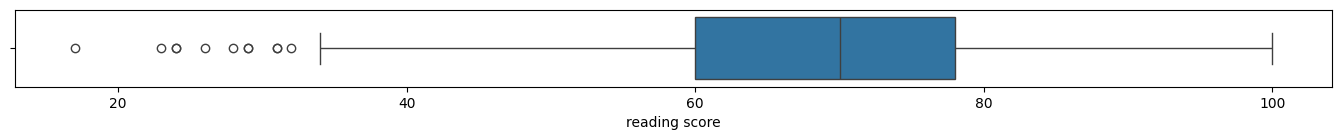

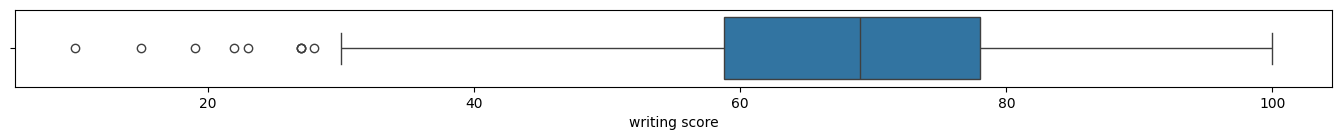

In [59]:
for column in numeric_cols:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)   #Plotting box plots

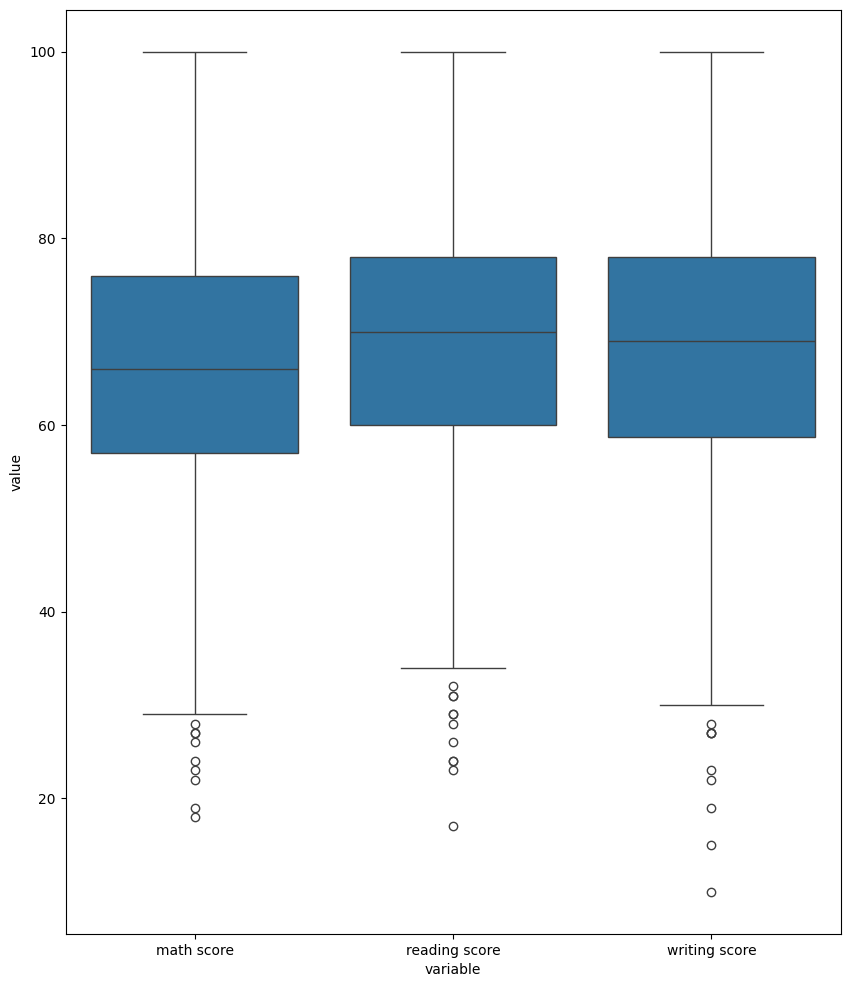

In [60]:
plt.figure(figsize=(10,12))
sns.boxplot(x="variable", y="value", data=pd.melt(df[numeric_cols]))

plt.show()

In [61]:
df.dtypes   #Checking data types

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [62]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [63]:
from scipy import stats


numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate z-scores
z = np.abs(stats.zscore(numeric_cols))

# Find rows where z-scores for all numeric columns are less than the threshold
threshold = 3
mask = (z < threshold).all(axis=1)  # Boolean mask for rows to keep

# Create a new DataFrame without outliers
df_new = df[mask]

# Print shapes to confirm changes
print("Original shape:", df.shape)
print("New shape:", df_new.shape)

Original shape: (1000, 8)
New shape: (992, 8)


In [64]:
numeric_cols = df_new.select_dtypes(include=['float64', 'int64'])

# Calculate the 1st (Q1) and 3rd (Q3) quartiles
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR
print(IQR)

math score       18.0
reading score    19.0
writing score    19.0
dtype: float64


In [65]:
#Calculating the low and high values

low = Q1 - 1.5 * IQR
high = Q3+1.5*IQR
print(low,high)

math score       31.0
reading score    31.5
writing score    30.5
dtype: float64 math score       103.0
reading score    107.5
writing score    106.5
dtype: float64


In [66]:
#Removing the outliers by checking if the value is less than the low limit or if the value is more than the high limit 

df_normalised = df_new.drop(df_new[(df_new['math score'] > high['math score']) & (df_new['math score'] < low['math score'])].index)   #Removing the outliers using IQR

In [67]:
df_normalised = df_new.drop(df_new[(df_new['reading score'] > high['reading score']) & (df_new['reading score'] < low['reading score'])].index)

In [68]:
df_normalised = df_new.drop(df_new[(df_new['writing score'] > high['writing score']) & (df_new['writing score'] < low['writing score'])].index)

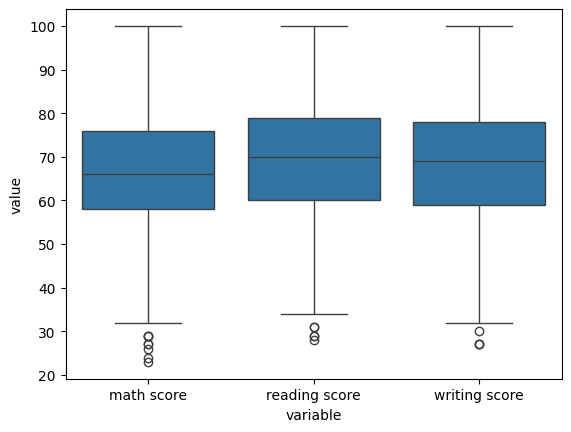

In [69]:
sns.boxplot(x="variable", y="value", data=pd.melt(numeric_cols))

plt.show()

In [70]:
df_normalised.describe()

,math score,reading score,writing score
count,992.000000,992.000000,992.000000
mean,66.380040,69.497984,68.494960
std,14.229265,13.703948,14.118211
min,23.000000,28.000000,27.000000
25%,58.000000,60.000000,59.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


In [71]:
from sklearn.preprocessing import MinMaxScaler

# Copy the original dataframe
df_min_max_scaled = df_normalised.copy()

# Select numeric columns
numeric_cols = df_min_max_scaled.select_dtypes(include=['float64', 'int64'])

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(numeric_cols)


# Convert the scaled data into a DataFrame and assign the correct column names
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols.columns)

# Display the first few rows of the scaled dataset
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,math score,reading score,writing score
0,0.636364,0.611111,0.643836
1,0.597403,0.861111,0.835616
2,0.870130,0.930556,0.904110
3,0.311688,0.402778,0.232877
4,0.688312,0.694444,0.657534


In [72]:
from sklearn.preprocessing import StandardScaler

df_std_scaled = df_scaled.copy()

#Apply Standard Scaling
std_scaler = StandardScaler()
df_std_scaled = std_scaler.fit_transform(numeric_cols)

# Convert the scaled data into a DataFrame and assign the correct column names
df_std_scaled = pd.DataFrame(df_std_scaled, columns=numeric_cols.columns)
 
print("Scaled Dataset Using StandardScaler")
df_std_scaled.head()

Scaled Dataset Using StandardScaler


,math score,reading score,writing score
0,0.395157,0.182668,0.390121
1,0.184218,1.496821,1.382249
2,1.660794,1.861863,1.736580
3,-1.362672,-0.912459,-1.735865
4,0.676410,0.620719,0.460988


In [73]:
df_std_scaled.describe()

,math score,reading score,writing score
count,9.920000e+02,9.920000e+02,9.920000e+02
mean,3.241135e-16,-1.325105e-16,-3.330669e-16
std,1.000504e+00,1.000504e+00,1.000504e+00
min,-3.050187e+00,-3.029705e+00,-2.940591e+00
25%,-5.892270e-01,-6.934334e-01,-6.728720e-01
50%,-2.672183e-02,3.665144e-02,3.579030e-02
75%,6.764097e-01,6.937278e-01,6.735864e-01
max,2.363925e+00,2.226906e+00,2.232643e+00


In [74]:
print(df_std_scaled.mean(numeric_only=True))
print(df_std_scaled.median(numeric_only=True))
print(df_std_scaled.mode(numeric_only=True))

math score       3.241135e-16
reading score   -1.325105e-16
writing score   -3.330669e-16
dtype: float64
math score      -0.026722
reading score    0.036651
writing score    0.035790
dtype: float64
   math score  reading score  writing score
0   -0.026722       0.036651        0.03579


In [75]:
print(df_new.mean(numeric_only=True))
print(df_new.median(numeric_only=True))
print(df_new.mode(numeric_only=True))

math score       66.380040
reading score    69.497984
writing score    68.494960
dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
   math score  reading score  writing score
0        66.0           70.0           69.0


In [76]:
#Checking the skewness of the original data

print("Before Normalisation")


print("Skewness of math score: ",df['math score'].skew())
print("Skewness of math score: ",df['reading score'].skew())
print("Skewness of math score: ",df['writing score'].skew())

Before Normalisation
Skewness of math score:  -0.16003707996253488
Skewness of math score:  -0.2807656166284484
Skewness of math score:  -0.31771048869740626


In [77]:
#Checking the skewness of the normalised data

print("After Normalisation")

print("Skewness of math score: ",df_std_scaled ['math score'].skew())
print("Skewness of reading score: ",df_std_scaled ['reading score'].skew())
print("Skewness of writing score: ",df_std_scaled ['writing score'].skew())

After Normalisation
Skewness of math score:  -0.07388597937422905
Skewness of reading score:  -0.14397157141423444
Skewness of writing score:  -0.14515630960695922


In [78]:
df_std_scaled.describe()

,math score,reading score,writing score
count,9.920000e+02,9.920000e+02,9.920000e+02
mean,3.241135e-16,-1.325105e-16,-3.330669e-16
std,1.000504e+00,1.000504e+00,1.000504e+00
min,-3.050187e+00,-3.029705e+00,-2.940591e+00
25%,-5.892270e-01,-6.934334e-01,-6.728720e-01
50%,-2.672183e-02,3.665144e-02,3.579030e-02
75%,6.764097e-01,6.937278e-01,6.735864e-01
max,2.363925e+00,2.226906e+00,2.232643e+00


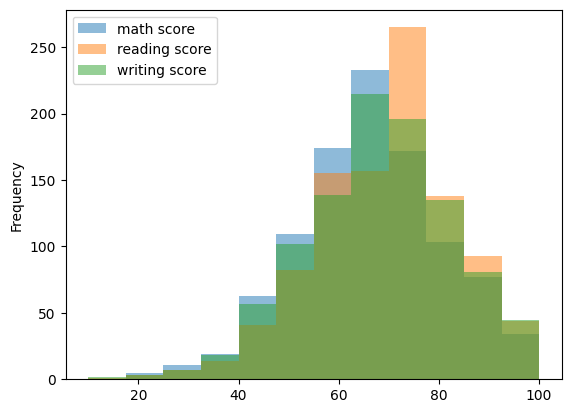

In [79]:
ax = df.plot.hist(bins=12, alpha=0.5)    #Plotting the histogramfor the original dataframe

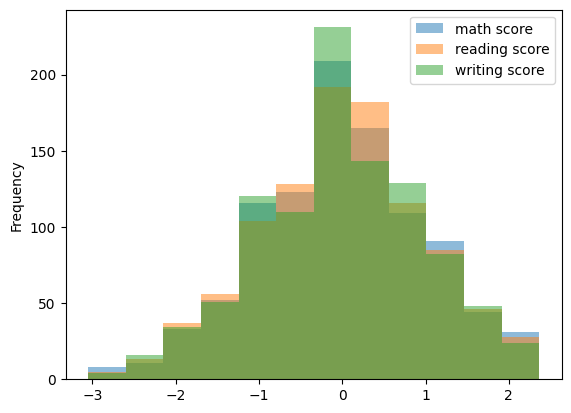

In [80]:
ax = df_std_scaled.plot.hist(bins=12, alpha=0.5)   #Plotting the histogram for the scaled datafram